<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/trabalho-UERJ-analise-de-dados/blob/main/plano_inclinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = (
    [0.71,0.709,0.706,0.709,0.711],
    [0.892,0.890,0.891,0.893,0.894],
    [1.044,1.04,1.039,1.043,1.042],
    [1.215,1.17,1.218,1.228,1.23],
    [1.364,1.365,1.367,1.37,1.362],
    [1.487,1.48,1.485,1.488,1.487],
    [1.619,1.620,1.629,1.618,1.619],
    [1.729,1.731,1.739,1.729,1.73],
    [1.841,1.842,1.849,1.848,1.843],
    [1.956,1.958,1.949,1.959,1.957]
)

In [7]:
df = pd.DataFrame(np.c_[data], columns=['30cm','40cm','50cm','60cm','70cm','80cm','90cm','100cm','110cm','120cm'])

In [13]:
def getVariancia(arraio): 
  media = arraio.mean()
  diferencas = list(map(lambda val: (val-media)**2,arraio.values))
  varianca = np.sum(diferencas)/len(arraio)
  return varianca

In [12]:
def getDesvioPadrao(arraio):
  variancia = getVariancia(arraio)
  return variancia**(1/2)

#print(np.std(df['no cronometro']))


In [10]:
def getErroInstrumental(arraio):
  desv = getDesvioPadrao(arraio)
  return desv / (len(arraio)**(1/2))

In [75]:
for key in df.keys():
  maximo , minimo , media = round(df[key].max(),3) , round(df[key].min(),3) ,  round(df[key].mean(),3)
  abr = round(maximo - minimo,3)
  desvioPd = round(getDesvioPadrao(df[key]),4)
  erroInstrumental = round(getErroInstrumental(df[key]),3)
  print(key)
  print(f'maximo {key} : {maximo}')
  print(f'minimo {key} : {minimo}')
  print(f'media {key} : {media}')
  print(f'abrangencia {key} : {abr}')
  print(f'desvio padrão: {desvioPd}')
  print(f'erro instrumental: {erroInstrumental}')
  print(f'estimativa: {media} ± {erroInstrumental}\n')

30cm
maximo 30cm : 0.711
minimo 30cm : 0.706
media 30cm : 0.709
abrangencia 30cm : 0.005
desvio padrão: 0.0017
erro instrumental: 0.001
estimativa: 0.709 ± 0.001

40cm
maximo 40cm : 0.894
minimo 40cm : 0.89
media 40cm : 0.892
abrangencia 40cm : 0.004
desvio padrão: 0.0014
erro instrumental: 0.001
estimativa: 0.892 ± 0.001

50cm
maximo 50cm : 1.044
minimo 50cm : 1.039
media 50cm : 1.042
abrangencia 50cm : 0.005
desvio padrão: 0.0019
erro instrumental: 0.001
estimativa: 1.042 ± 0.001

60cm
maximo 60cm : 1.23
minimo 60cm : 1.17
media 60cm : 1.212
abrangencia 60cm : 0.06
desvio padrão: 0.0219
erro instrumental: 0.01
estimativa: 1.212 ± 0.01

70cm
maximo 70cm : 1.37
minimo 70cm : 1.362
media 70cm : 1.366
abrangencia 70cm : 0.008
desvio padrão: 0.0027
erro instrumental: 0.001
estimativa: 1.366 ± 0.001

80cm
maximo 80cm : 1.488
minimo 80cm : 1.48
media 80cm : 1.485
abrangencia 80cm : 0.008
desvio padrão: 0.0029
erro instrumental: 0.001
estimativa: 1.485 ± 0.001

90cm
maximo 90cm : 1.629
minim

In [ ]:
obj = {}
obj['distância'] = []
obj['máximo'] = []
obj['mínimo'] = []
obj['media'] = []
obj['abrangência'] = []
obj['desvio padrão'] = []
obj['erro instrumental'] = []
obj['estimativa'] = []

for key in df.keys():
  maximo , minimo , media = round(df[key].max(),3) , round(df[key].min(),3) ,  round(df[key].mean(),3)
  abr = round(maximo - minimo,3)
  desvioPd = round(getDesvioPadrao(df[key]),4)
  erroInstrumental = round(getErroInstrumental(df[key]),3)
  estimativa = f'{media} ± {erroInstrumental}'
  obj['distância'].append(key)
  obj['máximo'].append(maximo)
  obj['mínimo'].append(minimo)
  obj['media'].append(media)
  obj['abrangência'].append(abr)
  obj['desvio padrão'].append(desvioPd)
  obj['erro instrumental'].append(erroInstrumental)
  obj['estimativa'].append(estimativa)

objDf = pd.DataFrame(obj)
objDf.to_html()

In [34]:
df.values[0]

array([0.71 , 0.892, 1.044, 1.215, 1.364, 1.487, 1.619, 1.729, 1.841,
       1.956])

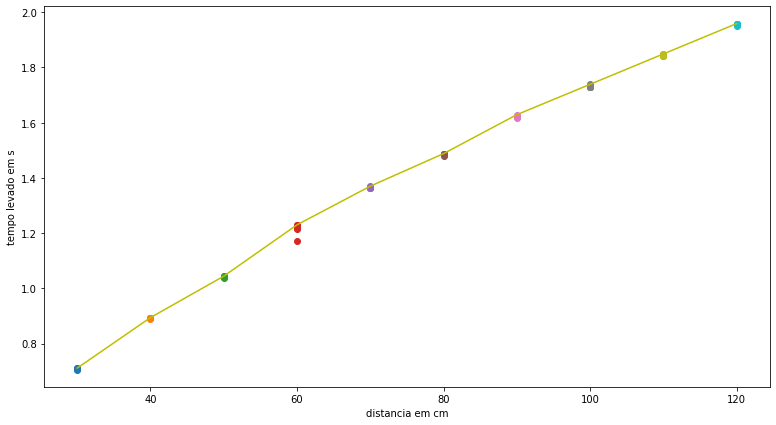

In [74]:
fig, ax = plt.subplots()
x= lambda n : list(map(lambda x: 10*n + 30,range(len(data[0]))))
for i in range(len(data)):
  ax.scatter(x=x(i) ,y= data[i])

base = list(map(lambda x: 30 + (10*x),range(len(data))))
counts = list(map(lambda x : np.max(x),data))
ax.plot(base,counts,color='y')
fig.set_size_inches(13,7)
ax.set_ylabel('tempo levado em s')
ax.set_xlabel('distancia em cm')
fig.patch.set_facecolor('xkcd:white')
fig.show()